## 2. 회귀분석의 기본 과정

regression overview 파트를 마친 이후부터는 simple linear regression부터 시작해서 nonlinear regression, spline regression 등 굉장히 다양한 regression 기법에 대해 심층적으로 다룰 예정이다. 이때, 모든 회귀 분석은 공통된 과정을 거치게 되는데, 수 많은 회귀분석 모형을 다루면서 항상 각 과정이 무엇인지 설명할 수 없다. 따라서 여기서 가장 기본적인, 그리고 머릿속에 심어두어야 할 회귀분석의 과정에 대해 다루고 넘어가도록 하겠다.

### 목표 : 회귀분석의 기본적인 과정을 알고 넘어가자

회귀분석도 데이터에 내재된 패턴을 찾는 활동이기 때문에 기본적으로 다른 데이터분석 과정과 같은 과정을 거친다.

1) __데이터 수집__ : 회귀분석은 데이터의 패턴을 찾는 작업이기 때문에, 분석할 데이터가 당연히 있어야한다. 그렇다면 데이터는 얼마나 필요할까? multiple regression에서는 50+8m (m은 독립변수의 개수)라는 규칙이 많이 알려져있다.(참고 : Samuel B. Green, 1991, How Many Subjects Does It Take To Do A Regression Analysis) 물론 여기에 답은 없다.

2) __데이터 전처리__ : Garbage in, garbage out. 데이터에 결함이 있거나 너무나 지저분하다면 분석의 결과도 좋지 않을 것이다. 회귀분석에서도 적용되는 말이며, 깨끗하고 정확한 데이터를 만드는 전처리 과정이 필요하다.

3) __모델 설정__ : 데이터 사이의 패턴을 결정하는 작업이다. 데이터가 선형적인 관계일지, 아니면 비선형적인지, 각 구역별로 다른 함수를 적용시킬지 이러한 모델을 결정해야 한다.

4) __모수 추정__ : 이전 과정에서 설정한 모델에서 패턴의 정확한 값을 결정하는 작업이다.

5) __결과 해석__ : 앞선 과정에서 얻어진 모델과 모수가 설득력이 있는지 등을 분석하는 작업이다. 회귀모형 자체가 타당한지 가설 검정을 하거나, 독립변수가 유효한지 가설 검정을 하거나, 회귀모형의 설명력을 분석하거나, 다른 데이터에 대한 예측 성능을 분석할 수 있다.

여기서는 __모델 설정, 모수 추정 내용을 집중적으로, 수리적인 내용과 (가능하다면)하드 코딩 위주__로 다룰 것이다.

## 2. 회귀분석의 과정 1 : 모델 설정

회귀분석을 간단하게 말하면 두 변수 사이의 함수 $Y_i = f(X_i, \beta) + e_i$ 를 추정하는 것이라고 하였다. <br/>모델을 설정하는 것은 위의 식에서 함수 $f$가 어떤 함수인지 결정하는 것이다. $f$는 deterministic한 함수일 수도 아닐 수도 있다. 굉장히 다양한 형태의 함수가 가능하고, 그것들에 무엇이 있는지 알아보는 것이 이 수업의 목표 중 하나이다.

회귀분석의 모델을 설정할 때에는 데이터를 기반으로 판단해야한다. 데이터 전처리 과정에서 어떤 모델을 설정해야하는지 어느정도 감을 잡아야한다. 따라서 실제 데이터분석 과정에서는 대부분의 시간을 EDA (Exploratory Data Analysis) 과정에 쏟게된다. 

### ___2-1. EDA Proecss 간략하게 알아보기___ 

데이터를 다양한 각도에서 관찰하고 이해하는 과정이다. 간단하게 여러 graphing 혹은 visualization tool이나 통계적인 방식으로 데이터의 특성을 직관적으로 이해해보는 과정이다.

__왜 필요한가?__  
언뜻 나중에 어차피 굉장히 수리적으로 디테일하게 분석할 것인데 직관적으로 대충 이해해보는 시도가 왜 필요한가라는 의문을 가질 수 있다. 하지만 이 과정에서 얻은 직관을 바탕으로 데이터의 전처리를 진행할 수 있고, 모델의 설정에 있어서도 여기서 얻어진 직관이 매우 중요한 작용을 하기 때문에 실제 전체과정의 효율과 효과에 지대한 영향을 끼친다. (ex. 예상하지 못했던 데이터의 패턴을 발견할 수 있고, 데이터에 내재된 문제나 왜곡을 발견할 수 있다)

__어떤 일들을 수행하는가?__ 
가장 기본적으로 (1) 어떤 변수가 있는지, 개별 변수의 이름과 실제 의미가 무엇인지 파악한다. 이러한 과정에서 항목형 데이터를 어떻게 처리할 것인지 결정하고, 항목형 데이터처럼 보이지만 실제로는 순서상의 의미를 가지는 데이터가 있으면 걸러내는 등 여러 전처리 전략을 도출할 수 있다. 그리고 (2) 데이터에 문제나 왜곡이 없는지 확인한다. 주기적으로 값이 빠져있을 수 있고, 데이터 수집 과정에서 데이터 자체에 왜곡이 발생할 수 있다. 또한 에러가 발생한 것이나 이상하게 너무 높거나 작은 값이 있는 경우 걸러낸다. (3) 데이터 전체적인 패턴을 대략적으로 확인한다. 여러 그래프 시각화 툴이나 간단한 통계적 분석을 통해서 데이터에 내재된 경향성을 파악할 수 있다. 또한 변수의 값 양 끝에서 어떠한 특성이 있는지, 데이터의 분포가 조밀한지 등을 확인하여 이후의 모델 설정에서 활용한다.


우리가 하려는 것은 EDA가 아닌 Regression이기에 EDA에 관련된 내용은 더이상 다루지 않는다.

### ___2-2. Regression 모델 설정시 고려해야 할 점___

#### 1) 어떤 독립변수를 포함시킬 것인가? 모든 변수를 포함시킬 수 있고, 유의미한 특정 변수들만 포함시켜서 모델을 만들 수 있다.
#### 2) 모델이 너무 단순하거나 복잡하지 않은가?
#### 3) 데이터 수 대비 모수의 수가 너무 적거나 많지는 않은가?


예를 들어서 아래와 같은 데이터를 보면 당연히 단순 선형 회귀(Simple Linear Regression) 모델을 설정
물론 해당 모델에 다른 모델, 특히 더욱 sophisticated한 모델을 적용해도 괜찮다. 오히려 더 좋은 성능이 나올 수 있다. 하지만 더 정교한 모델을 사용할수록 overfitting의 문제가 발생할 확률이 높아진다. 다시 말해서, 회귀분석 모델의 학습에 필요한 데이터에 대한 성능은 잘 나오지만 새로운 데이터에 대한 성능은 오히려 떨어진다는 것이다.

### 간단한 예시
아래 간단한 예시를 통해 다시 이해해보자.
코드를 간단하게 설명해보면

(1) 회귀분석을 하기위한 데이터를 생성하였다. (X, Y)의 하나의 독립변수와 하나의 종속변수로 구성된 100개의 데이터를 생성하였으며, 어느정도의 noise를 주었다. (noise=0 이면 완전히 선형의 데이터가 생성된다.)

(2) 생성된 데이터를 학습을 위한 train dataset과 성능 테스트를 위한 test dataset으로 나눈다.

(3) 단순 선형회귀분석/ 2차 다항회귀분석을 실행하여 test dataset과 train dataset에 대한 score를 구하였다.

결과 : train dataset에 대해서는 다항회귀분석을 실행했을때의 score가 단순선형회귀분석을 실행했을때의 score보다 더 나았다. 다항회귀 모델이 선형회귀 보델보다 주어진 데이터만의 패턴을 좀 더 디테일하게 잡을 수 있으니(모수가 2개 vs 4개로 차이가 남) 당연히 주어진 데이터셋에 대한 score는 나을 것이다. 하지만 다항회귀 모델은 주어진 데이터셋만이 가지고 있는 디테일한 패턴까지 학습하여 경험해보지 못한 데이터셋 test dataset에 대해서는 score가 linear regression보다 낮았다.

교훈 : 복잡하고 정교한 모델을 썼다고 좋은 모델도 아니고, 그렇다고 무턱대로 간단한 모델을 쓰는 것도 좋지 않다. 주어진 데이터 셋에 적합한 모델을 설정하는 것이 굉장히 중요하다. (이 문제는 overfitting & underfitting 문제, 혹은 통계에서는 Bias-Variance Trade-off 문제로 불린다. 나중에 자세히 다룰 것이다.)

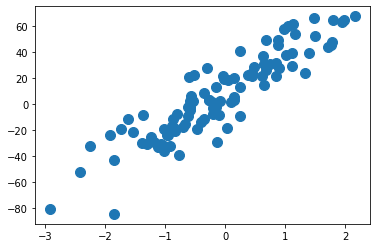

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X, Y, c = make_regression(n_samples=100, n_features=1, bias=10, noise=15, coef=True, random_state=3)
plt.scatter(X, Y, s=100)
plt.show()

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)

In [34]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

print("Simple Linear Regression(Test) :", clf.score(X_test, Y_test))
print("Simple Linear Regression(Train) :", clf.score(X_train, Y_train))

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, Y_train)

print("2nd Degree Polynomial Regression(Test) :", poly_reg.score(X_test_poly, Y_test))
print("2nd Degree Polynomial Regression(Train) :", poly_reg.score(X_train_poly, Y_train))

Simple Linear Regression(Test) : 0.784519040968252
Simple Linear Regression(Train) : 0.834218973047781
2nd Degree Polynomial Regression(Test) : 0.7681793309502216
2nd Degree Polynomial Regression(Train) : 0.8353232721595307


## 3. 회귀분석의 과정 2 : 모수 추정

회귀분석의 모델을 결정하였으면 이제 데이터로 학습을 진행하여 모수를 추정해야한다.<br/>
모수를 추정한다는 것은 회귀분석 모델에 있는 parameter들, 즉 변수의 coefficient들을 구한다는 것이다.

회귀의 모수 추정 과정은 크게 loss function 결정과 optimization problem 해결의 두 단계로 이루어진다. 예를 들어서, 가장 많이 사용하는 최소자승법(Least Square Method)의 경우 loss function으로 square error ($e^{(i)} = \hat{y}^{(i)}-y^{(i)}$)를 사용한다.

loss function을 결정한 후에는 최적화 문제를 해결해야한다. 왜냐하면 모수는 training dataset의 average loss를 최소화하는 최적화문제의 해이기 때문이다. 예를 들어서, 단순선형회귀는 모델을 $Y=\alpha X + \beta$ 로 설정하고, loss function을 square error로 결정한다면 모수 $\alpha, \beta$ 는 $ \frac{1}{N} \sum_{i=1}^N (f(X^{(i)}) - Y^{(i)})^2$ 을 최소화하는 값으로 추정한다.

회귀분석에서 loss function은 결국 최적화 문제를 정의하는 가장 중요한 요소이며, 따라서 어떤 loss function을 선택하냐에 따라서 회귀분석모델이 가지게 되는 특성과 성능이 달라지며, 또한 loss function에 따라 최적화 문제를 해결하는 과정에서 필요한 계산량도 많이 달라지기에 loss function을 결정하는 것은 대단히 중요한 문제이다.

### Definition of Loss Function
loss function ${\ell(\hat{y}, y)}$은 추정값과 실제값을 입력받아서 오차를 계산해주는 함수이다. 

### Several Loss Functions

1) square error $\ell(\hat{y}, y)=(\hat{y}-y)^2$ :   가장 많이 쓰임, 쉬움, robust 하지 않음, 미분 가능 <br/>
2) absolute error $\ell(\hat{y}, y)=|\hat{y}-y|$ :   robust 함, 미분 불가, constant gradient 문제 <br/>
3) huber loss : $\ell(\hat{y},y,\delta)=\left\{\begin{matrix}
{\frac{(\hat{y}-y)^2}{2}} & \text{if}\ |\hat{y}-y|\leq \delta \\ 
\delta|\hat{y}-y|-\frac{\delta^2}{2} & \text{if}\ |\hat{y}-y|> \delta
\end{matrix}\right.$ :  robust 하고 미분 가능, constant gradient 문제 해결<br/>

이 외에도 여러가지 loss function이 있지만 나중에 더 깊이 다룬다.

### Example : Loss Function
Loss Function에 따라 Regression Model의 성능이 어떻게 달라지는지 예를 통해 보도록 하자.

(1) loss_function_data.csv에 저장된 데이터를 읽어서 산점도를 그려보았다. 선형성이 있어보이지만, (3, 14), (9.5, 6), (16, 7) 부근에 outlier로 보이는 데이터가 확인된다.<br/>
(2) Least Mean Square를 Loss Function으로 사용하는 회귀모델과 Huber Loss를 사용하는 회귀모델을 각각 만들었다. (1)에서 언급한 outlier에 크게 영향을 받아 LMS 모델은 Huber 모델에 비해 좀 더 낮은 기울기를 가진 모델을 학습하였다.

교훈 : 모델에 적합한 robustness에 따라 loss function을 정하는데 있어서 신중할 필요가 있다.

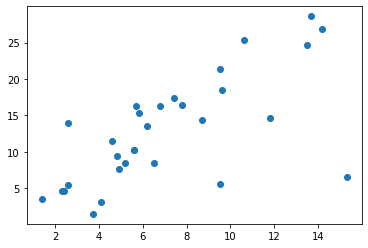

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

loss_function_data = pd.read_csv('./loss_function_data.csv')

x = loss_function_data['X'].to_numpy()
y = loss_function_data['Y'].to_numpy()
x_start = min(x)
x_fin = max(x)

plt.plot(x,y, 'o')
plt.show()

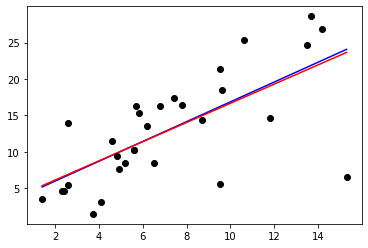

In [78]:
from sklearn.linear_model import HuberRegressor, LinearRegression

##### Implementing Least Mean Square Regression Model
lms_model = LinearRegression(fit_intercept=True)
lms_model.fit(x[:,np.newaxis], y)

xfit_lms = np.linspace(x_start, x_fin, 100)
yfit_lms = lms_model.predict(xfit_lms[:, np.newaxis])

##### Implementing Huber Loss Regression Model
huber_model = HuberRegressor(epsilon=3)
huber_model.fit(x[:,np.newaxis], y)
xfit_huber = np.linspace(x_start, x_fin, 100)
yfit_huber = huber_model.predict(xfit_huber[:, np.newaxis])

plt.plot(xfit_huber, yfit_huber, color="blue", label="Huber")
plt.plot(xfit_lms, yfit_lms, color="red", label="LMS")
plt.plot(x,y, 'o', color="black")
plt.show()

### Optimization Problem of Regression


실제로 결과가 달라지는지 예시 보여주기 (robustness)

1) iterative method
why?
what should we consider?
2) analytical method


### 참고

1) 학습하다 = 모수를 추정하다 = 모수를 구하다 = 패러미터를 구하다 : 모두 같은 말이다